<a href="https://colab.research.google.com/github/ddcreating/RL_code/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [1]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 2.6 MB/s eta 0:00:00


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [2]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.49e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 45        |
|    time_elapsed    | 17        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 26.7      |
|    critic_loss     | 0.181     |
|    ent_coef        | 0.812     |
|    ent_coef_loss   | -0.337    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.41e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 41        |
|    time_elapsed    | 38        |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 49.8      |
|    critic_loss     | 0.149     |
|    ent_coef        | 0.647     |
|    ent_coef_loss   | -0.596    |
|    learning_rate   | 0.0003    |
|    n_updates       | 1499      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.32e+03 |
| time/              |           |
|    episodes        | 12        |
|    fps             | 40        |
|    time_elapsed    | 59        |
|    total_timesteps | 2400      |
| train/             |           |
|    actor_loss      | 69        |
|    critic_loss    

# Visualize the result

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

In [4]:
!pip install "stable-baselines3[extra]" "gymnasium[mujoco]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 18.6 MB/s eta 0:00:00


In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env


In [6]:
class RewardLogger(BaseCallback):
    """
    Custom callback: Records the total reward and corresponding time steps for each episode during training.
    """
    def __init__(self, verbose: int = 0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.timesteps = []

    def _on_step(self) -> bool:
        infos = self.locals.get("infos", None)
        if infos is not None:
            for info in infos:
                if "episode" in info.keys():
                    ep_info = info["episode"]
                    self.episode_rewards.append(ep_info["r"])
                    self.episode_lengths.append(ep_info["l"])
                    self.timesteps.append(self.num_timesteps)
                    if self.verbose > 0:
                        print(f"Episode done: R={ep_info['r']:.2f}, len={ep_info['l']}")
        return True


In [7]:
# Create a HalfCheetah environment
env_id = "HalfCheetah-v4"

env = make_vec_env(env_id, n_envs=1)

TOTAL_TIMESTEPS = 300_000  # or 100_000、500_000

logger_default = RewardLogger(verbose=0)

# ent_coef="auto" Represents automatic entropy temperature adjustment
model_default = SAC(
    "MlpPolicy",
    env,
    verbose=1,
    ent_coef="auto",
    tensorboard_log="./sac_halfcheetah_tb_default/"
)

model_default.learn(
    total_timesteps=TOTAL_TIMESTEPS,
    callback=logger_default
)


/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Using cpu device
Logging to ./sac_halfcheetah_tb_default/SAC_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -276     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 35       |
|    time_elapsed    | 112      |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -32.2    |
|    critic_loss     | 1.46     |
|    ent_coef        | 0.316    |
|    ent_coef_loss   | -10.2    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -273     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 36       |
|    time_elapsed    | 221      |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss    

In [8]:
# Set the entropy temperature for multiple sets of experiments
ent_coefs = [0.1, 0.2]
results = {}

for ent in ent_coefs:
    print(f"\n==== Train SAC with ent_coef={ent} ====")
    env = make_vec_env(env_id, n_envs=1)

    logger = RewardLogger(verbose=0)
    model = SAC(
        "MlpPolicy",
        env,
        verbose=1,
        ent_coef=ent,   # Fixed entropy temperature
        tensorboard_log=f"./sac_halfcheetah_tb_ent{ent}/"
    )

    model.learn(
        total_timesteps=TOTAL_TIMESTEPS,
        callback=logger
    )

    results[ent] = {
        "logger": logger,
        "model": model
    }



==== Train SAC with ent_coef=0.1 ====
Using cpu device
Logging to ./sac_halfcheetah_tb_ent0.1/SAC_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -163     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 38       |
|    time_elapsed    | 102      |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -1.67    |
|    critic_loss     | 0.365    |
|    ent_coef        | 0.1      |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -151     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 39       |
|    time_elapsed    | 203      |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss

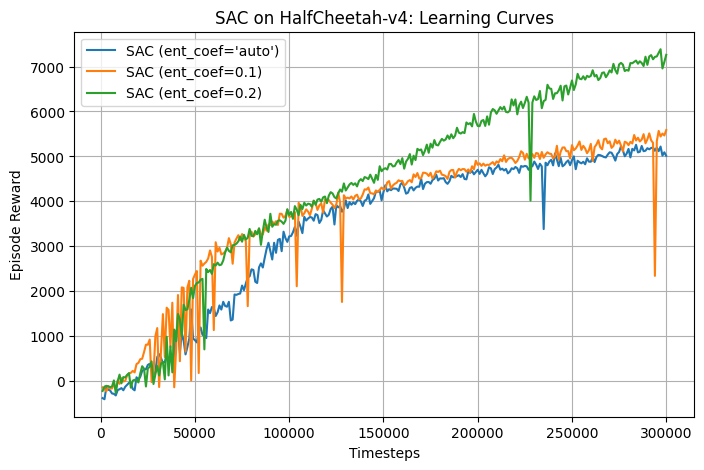

In [9]:
plt.figure(figsize=(8, 5))

# The default automatic temperature setting
plt.plot(
    logger_default.timesteps,
    logger_default.episode_rewards,
    label="SAC (ent_coef='auto')"
)

# Curves with different ent_coef values
for ent, res in results.items():
    lg = res["logger"]
    plt.plot(
        lg.timesteps,
        lg.episode_rewards,
        label=f"SAC (ent_coef={ent})"
    )

plt.xlabel("Timesteps")
plt.ylabel("Episode Reward")
plt.title("SAC on HalfCheetah-v4: Learning Curves")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# The evaluation was conducted using the automatic temperature model.
eval_env = gym.make(env_id, render_mode=None)  # If you want to see the visuals, change it to "human".
obs, info = eval_env.reset(seed=42)

episode_reward = 0.0
for step in range(1000):
    action, _ = model_default.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = eval_env.step(action)
    episode_reward += reward
    if terminated or truncated:
        break

eval_env.close()
print("Eval episode reward (deterministic policy):", episode_reward)


Eval episode reward (deterministic policy): 5387.919328863354


## Results and Discussion

### 1. Performance compared to Q-learning
SAC performs clearly better than my previous algorithm (Q-learning).  
The learning curve rises faster, is more stable, and reaches much higher episode returns.  
The final deterministic evaluation of the SAC policy (~5388 reward) is also significantly higher than what Q-learning achieved in the same environment.

### 2. Effect of entropy temperature (ent_coef)
I tested three settings: `auto`, `0.1`, and `0.2`.

- **ent_coef="auto"**: Most stable curve, smoothest improvement, and highest final performance.  
- **ent_coef=0.1**: Faster early learning but less stable; tends to exploit too early.  
- **ent_coef=0.2**: More exploration but noisier and slower to converge.

Overall, the automatic temperature gives the best balance between exploration and stability.

### 3. Differences in exploration and movement behavior
- **Auto**: Early actions are noisy, later become smooth and efficient; learns a stable running gait.  
- **0.1**: More deterministic behavior, less exploration; sometimes converges to a conservative running style.  
- **0.2**: Highly exploratory, larger movement variations, and more unstable early behavior.

In summary, higher entropy increases exploration but reduces stability, while lower entropy gives more consistent but less exploratory behavior.
